<a href="https://colab.research.google.com/github/seymadogru/BasicDataTypes/blob/master/_51_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import random
import math
import csv
import cv2
import os
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

In [3]:
inputBasePath = "/content/drive/MyDrive/CDD-CESM_last"
outputBasePath = "/content/drive/MyDrive/imagearraynew"

In [4]:
image_width = 224
image_height = 224

In [5]:
classes = ['Benign','Malignant','Normal']

In [6]:
os.chdir(inputBasePath)

In [7]:
X = []
Y = []

In [8]:
i = 0
for class1 in classes:
  os.chdir(class1)
  print('=> '+class1)
  for files in os.listdir('./'):
    img = cv2.imread(files)
    img = cv2.resize(img, (image_width,image_height))
    X.append(img)
    Y.append(class1)
    i = i + 1
  os.chdir('..')

=> Benign
=> Malignant
=> Normal


In [9]:
print("X : ",len(X))
print("Y : ",len(Y))

X :  17006
Y :  17006


In [12]:
X = np.array(X).reshape(-1,image_width,image_height,3)
Y = np.array(Y)

In [11]:
os.chdir('..')

In [13]:
os.chdir("imagearraynew")

In [14]:
np.save(str(image_width)+'x'+str(image_height)+'_images', X)

np.save(str(image_width)+'x'+str(image_height)+'_labels', Y)

In [15]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
utils.to_categorical

<function keras.src.utils.np_utils.to_categorical(y, num_classes=None, dtype='float32')>

In [16]:
data = np.load('/content/drive/MyDrive/imagearraynew/224x224_images.npy')
labels = np.load('/content/drive/MyDrive/imagearraynew/224x224_labels.npy')
data.shape

(17006, 224, 224, 3)

In [17]:
labelEn = LabelEncoder()
labels = labelEn.fit_transform(labels)
labels = to_categorical(labels)

In [18]:
data =  data.reshape(-1,image_width , image_height , 3)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = .05, shuffle = True)

In [20]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = .05, shuffle = True,random_state=42)

In [21]:
import keras

In [23]:
from tensorflow.keras.applications.vgg16 import VGG16  # The Transfer Learning model to be used in this project...
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
vgg = VGG16()

553467096/553467096 [==============================] - 14s 0us/step


In [24]:
vgg_layers = vgg.layers
print(vgg_layers)

[<keras.src.engine.input_layer.InputLayer object at 0x7f8db8661240>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f8db79d5d50>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f8db79d64d0>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f8db79d60b0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f8db79d75e0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f8db79d7970>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f8db77b1720>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f8db77b1ff0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f8db77b0eb0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f8db77b2aa0>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f8db77b2ce0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f8db77b3550>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f8db77b0e50>, <keras.src.layers.convolutional.co

In [25]:
vggmodel_layersize_tobe_used = len(vgg_layers) - 1

model = Sequential()
for i in range(vggmodel_layersize_tobe_used):
    model.add(vgg_layers[i])

In [26]:
numberOfCancerTypes = 3

In [27]:
for layers in model.layers:
    layers.trainable = False

# Since I have omitted the original output layer of VGG16, I have to add my new output layer to my new model!
model.add(Dense(numberOfCancerTypes, activation="softmax"))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [28]:
# After model design is complete, it's time to compile...
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

In [31]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [32]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1,  factor=0.5, min_lr=0.00001)

In [33]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [34]:
epc = 30
bs = 16
model.fit(x_train,y_train, batch_size=bs,
                              epochs = epc, validation_data = (x_validate,y_validate),
                              verbose = 1, callbacks=[learning_rate_reduction])

Epoch 1/30
960/960 [==============================] - 74s 71ms/step - loss: 1.0953 - accuracy: 0.4423 - val_loss: 1.0455 - val_accuracy: 0.4740 - lr: 1.0000e-04
Epoch 2/30
960/960 [==============================] - 65s 68ms/step - loss: 0.9920 - accuracy: 0.5004 - val_loss: 1.0384 - val_accuracy: 0.4889 - lr: 1.0000e-04
Epoch 3/30
960/960 [==============================] - 66s 68ms/step - loss: 0.9512 - accuracy: 0.5329 - val_loss: 1.0633 - val_accuracy: 0.4926 - lr: 1.0000e-04
Epoch 4/30
960/960 [==============================] - 66s 68ms/step - loss: 0.9298 - accuracy: 0.5464 - val_loss: 0.9930 - val_accuracy: 0.5309 - lr: 1.0000e-04
Epoch 5/30
960/960 [==============================] - 65s 68ms/step - loss: 0.9067 - accuracy: 0.5604 - val_loss: 0.9824 - val_accuracy: 0.4988 - lr: 1.0000e-04
Epoch 6/30
960/960 [==============================] - 65s 68ms/step - loss: 0.8886 - accuracy: 0.5753 - val_loss: 0.9863 - val_accuracy: 0.5309 - lr: 1.0000e-04
Epoch 7/30
959/960 [==============

27/27 [==============================] - 14s 298ms/step


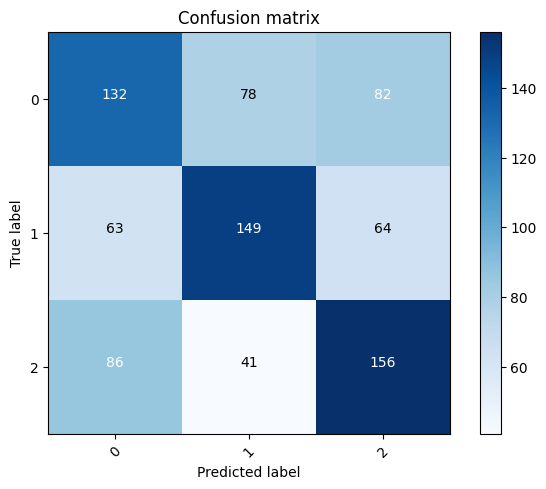

In [36]:

import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)  #test süreci için Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3))

In [37]:
from sklearn.metrics import classification_report
report = classification_report(Y_true, Y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.47      0.45      0.46       292
           1       0.56      0.54      0.55       276
           2       0.52      0.55      0.53       283

    accuracy                           0.51       851
   macro avg       0.51      0.51      0.51       851
weighted avg       0.51      0.51      0.51       851

